<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Twitter Sentiment Analysis <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">PROBLEM STATEMENT </h1>

Sentiment Analysis in business, also known as opinion mining is a process of identifying and cataloging a piece of text according to the tone conveyed by it. 
This text can be tweets, comments, feedback, and even random rants with positive, negative and neutral sentiments associated with them. 
Every business needs to implement automated sentiment analysis. 
If you doubt it, here’s a little perspective. The accuracy can never be 100%. 
And of course, a machine does not understand sarcasm. 
However, according to a research, people do not agree 80% of the time. 
It means that even if the machine accuracy does not score a perfect 10, it will still be more accurate than human analysis. 
Also, when the corpus is huge, manually analyzing is not an option. Hence, sentiment analysis in business is more than just a trend.
The applications of sentiment analysis in business cannot be overlooked. 
Sentiment analysis in business can prove a major breakthrough for the complete brand revitalization. 
The key to running a successful business with the sentiments data is the ability to exploit the unstructured data for actionable insights. 
Machine learning models, which largely depend on the manually created features before classification, have served this purpose fine for the past few years. 
However, deep learning is a better choice as it:
Automatically extracts the relevant features.
Helps to scrape off the redundant features.
Rules out the efforts of manually crafting the features.
At ParallelDots, we have powerful sentiment analysis API that uses deep learning which provides an accurate analysis of the overall sentiment of the given text.

<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">IMPORTING NECESSARY LIBRARIES </h2>

In [16]:
# Importing Dependencies

# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from warnings import filterwarnings
filterwarnings('ignore')

from wordcloud import WordCloud

import nltk
nltk.download('wordnet')

import pickle

import time

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91834\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">DATASET DETAILS </h2>

It contains the following 6 fields:

 1.sentiment: the polarity of the tweet (0 = negative, 4 = positive)
 
 2.ids: The id of the tweet (2087)
 
 3.date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
 
 4.flag: The query (lyx). If there is no query, then this value is NO_QUERY.
 
 5.user: the user that tweeted (robotickilldozr)
 
 6.text: the text of the tweet (Lyx is cool)
 
 We require only the sentiment and text fields, so we discard the rest.

 Furthermore, we're changing the sentiment field so that it has new values to reflect the sentiment. (0 = Negative, 1 = Positive)

<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> DATA PREPROCESSING <br>
                    </b>
                </font>
            </div>
        </td>
</table>

In [2]:
# Importing dataset
# The dataset being used is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the Twitter API. The tweets 
# have been annotated (0 = Negative, 4 = Positive) and they can be used to detect sentiment.

# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('Sentiment140.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

dataset.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
dataset.shape

(1600000, 6)

<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Working with Required Dataset</h2>

In [4]:
# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]
# Replacing the values to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

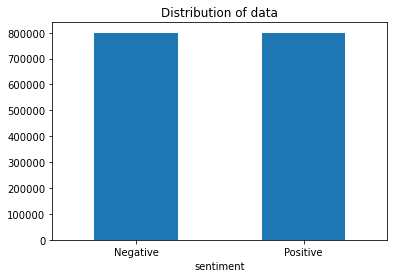

In [5]:
# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [6]:
dataset["sentiment"].value_counts()

1    800000
0    800000
Name: sentiment, dtype: int64

In [7]:
# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [8]:
dataset.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


Data Description

In [9]:
# Here, columns other than sentiment and target are redundant columns

#redundant_dataset = dataset[['ids','date', 'flag', 'user']]
#redundant_dataset

<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> FEATURE EXTRACTION <br>
                    </b>
                </font>
            </div>
        </td>
</table>

### Text Preprocessing 

 

 Text Preprocessing is traditionally an important step for Natural Language Processing (NLP) tasks. It transforms text into a 
 more digestible form so that machine learning algorithms can perform better.

 The Preprocessing steps taken are:

 1.Lower Casing: Each text is converted to lowercase.
    
 2.Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".
    
 3.Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")
    
 4.Replacing Usernames: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")
    
 5.Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.
    
 6.Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")
    
 7.Removing Short Words: Words with length less than 2 are removed.
    
 8.Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be 
 ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

 9.Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)


### Creating dictonaries to replace emojis 

In [10]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

### Creating dictonaries to replace stopwords

In [11]:
## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

### Function to preprocess the data

In [12]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
                
        processedText.append(tweetwords)
        
    return processedText

In [13]:
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 94 seconds


In [14]:
processedtext[0:10]

['USER URL aww that bummer you shoulda got david carr of third day to do it EMOJIwink ',
 'is upset that he can update his facebook by texting it and might cry a result school today also blah ',
 'USER dived many time for the ball managed to save 50 the rest go out of bound ',
 'my whole body feel itchy and like it on fire ',
 'USER no it not behaving at all mad why am here because can see you all over there ',
 'USER not the whole crew ',
 'need hug ',
 'USER hey long time no see yes rain bit only bit lol fine thanks how you ',
 'USER nope they didn have it ',
 'USER que me muera ']

<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> VISUALIZATION OF DATA FOR NEGATIVE & POSITIVE RATINGS</h2>



Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot Word Clouds for Positive and 
Negative tweets from our dataset and see which words occur the most.

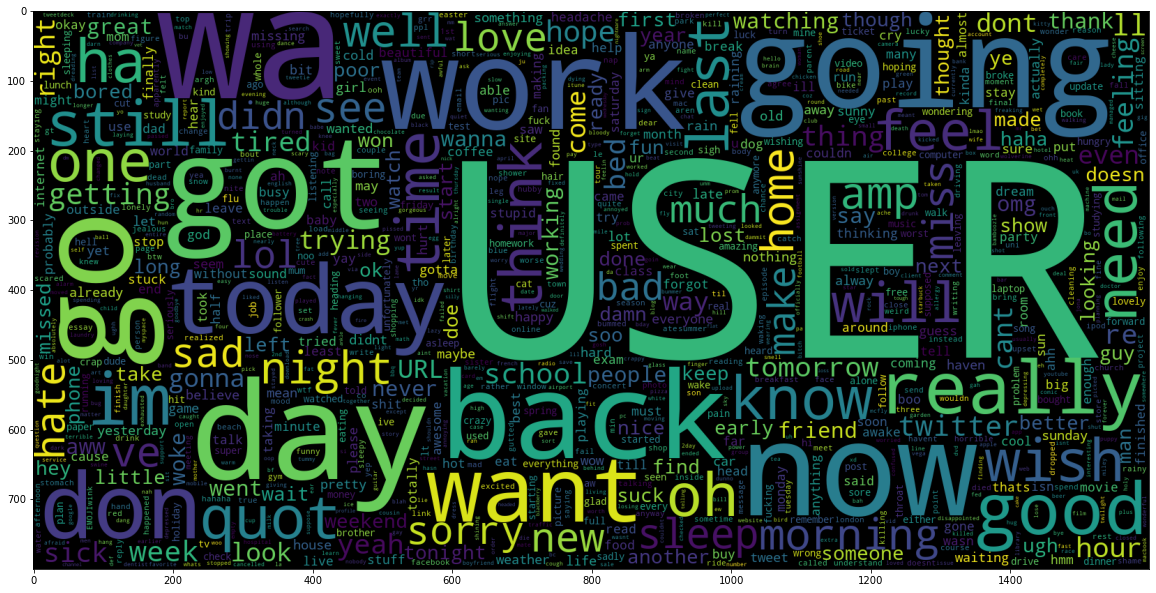

In [20]:
# Word-Cloud for Negative tweets.

data_neg = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

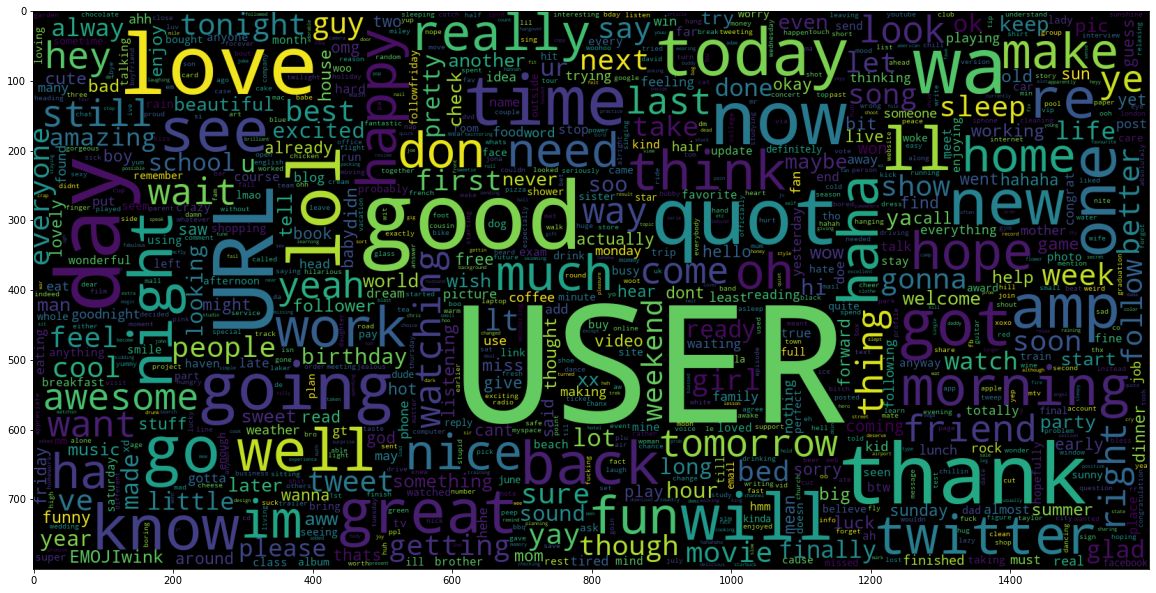

In [17]:
# Word-Cloud for Positive tweets.

data_pos = processedtext[800000:]
plt.figure(figsize = (20,20))

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)
plt.show()

<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> TRAIN - TEST SPLIT</h2>

In [18]:
# Splitting the Data
# The Preprocessed Data is divided into 2 sets of data:

# Training Data: The dataset upon which the model would be trained on. Contains 95% data.
# Test Data: The dataset upon which the model would be tested against. Contains 5% data.

X_train, X_test, y_train, y_test = train_test_split(processedtext[:1600000], sentiment,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> TRANSFORMING THE DATASET USING TF-IDF VECTORIZER</h2>

TF-IDF Vectoriser
 TF-IDF indicates what the importance of the word is in order to understand the document or dataset. Let us understand with an
 example. Suppose you have a dataset where students write an essay on the topic, My House. In this dataset, the word a appears
 many times; it’s a high frequency word compared to other words in the dataset. The dataset contains other words like home, 
 house, rooms and so on that appear less often, so their frequency are lower and they carry more information compared to the 
 word. This is the intuition behind TF-IDF.

 TF-IDF Vectoriser converts a collection of raw documents to a matrix of TF-IDF features. The Vectoriser is usually trained on 
 only the X_train dataset.

 ngram_range is the range of number of words in a sequence. [e.g "very expensive" is a 2-gram that is considered as an extra 
 feature separately from "very" and "expensive" when you have a n-gram range of (1,2)]

 max_features specifies the number of features to consider. [Ordered by feature frequency across the corpus].

In [19]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print(f'No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  500000


In [20]:
# Tranforming the dataset
# Transforming the X_train and X_test dataset into matrix of TF-IDF Features by using the TF-IDF Vectoriser. This datasets will 
# be used to train the model and test against it.

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> MODEL BUILDING : FOR SENTIMENT CLASSIFICATION <br>
                    </b>
                </font>
            </div>
        </td>
</table>

In [21]:
# Creating and Evaluating Models
# We're creating 3 different types of model for our sentiment analysis problem:

# 1.Bernoulli Naive Bayes (BernoulliNB)
# 2.Linear Support Vector Classification (LinearSVC)
# 3.Logistic Regression (LR)

# Since our dataset is not skewed, i.e. it has equal number of Positive and Negative Predictions. We're choosing Accuracy as our
# evaluation metric. Furthermore, we're plotting the Confusion Matrix to get an understanding of how our model is performing on 
# both classification types.

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Function for Evaluation of Model Selection</h3>

In [22]:
# Evaluate Model Function

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> To predict the best model</h3>

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> 1. Logistic Regression</h3>

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39989
           1       0.82      0.84      0.83     40011

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



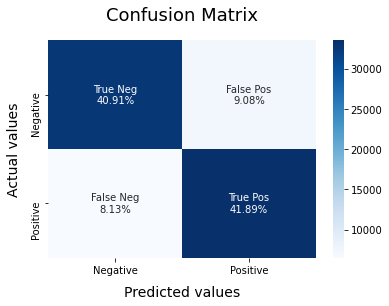

In [23]:
#Logistic Regression Model
LRmodel = LogisticRegression(C = 2, max_iter = 100, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> 2. Bernoulli Naive Bayes Model</h3>

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39989
           1       0.80      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



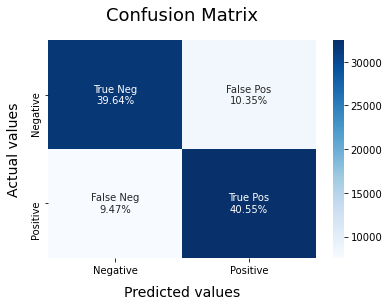

In [24]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> 3. Decision Tree classifier</h3>

              precision    recall  f1-score   support

           0       0.60      0.65      0.62     39989
           1       0.62      0.57      0.59     40011

    accuracy                           0.61     80000
   macro avg       0.61      0.61      0.61     80000
weighted avg       0.61      0.61      0.61     80000



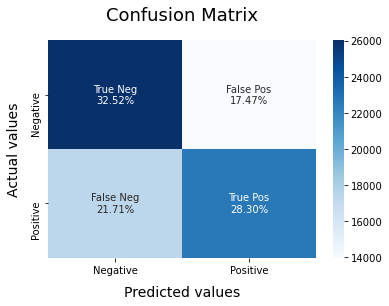

In [25]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=10)
dt.fit(X_train, y_train)
model_Evaluate(dt)

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> 4. Random Forest classifier</h3>

              precision    recall  f1-score   support

           0       0.62      0.69      0.65     39989
           1       0.65      0.57      0.61     40011

    accuracy                           0.63     80000
   macro avg       0.63      0.63      0.63     80000
weighted avg       0.63      0.63      0.63     80000



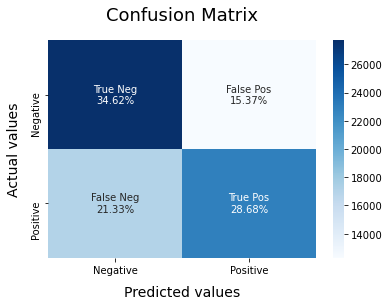

In [26]:
rfc = RandomForestClassifier(n_estimators=20, max_depth=4, criterion='entropy', max_features=0.3, max_samples=0.7)
rfc.fit(X_train, y_train)
model_Evaluate(rfc)

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> 5.Ada Boost Classifier </h3>

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     39989
           1       0.71      0.67      0.69     40011

    accuracy                           0.70     80000
   macro avg       0.70      0.70      0.70     80000
weighted avg       0.70      0.70      0.70     80000



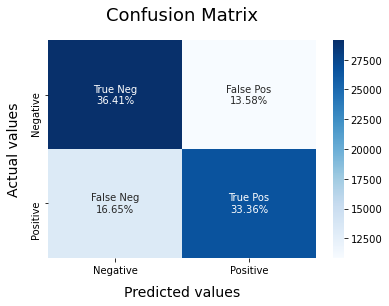

In [96]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
model_Evaluate(abc)

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> 6.Gradient Boosting Classifier </h3> 

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     39989
           1       0.71      0.67      0.69     40011

    accuracy                           0.70     80000
   macro avg       0.70      0.70      0.70     80000
weighted avg       0.70      0.70      0.70     80000



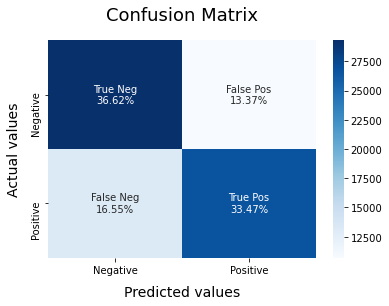

In [97]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
model_Evaluate(gbc)

<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=6px>
                    <b> HYPER PARAMETER TUNING <br>
                    </b>
                </font>
            </div>
        </td>
</table>

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

We are doing hyperparameter tuning for Logistic regression and Bernoulli Naive Bayes as they are giving us the highest acccuracy.


<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> 1. LOGISTIC REGRESSION </h3>

In [25]:
# Tunned Logistic Regression
params = {'C':[0.01,0.1,1,2,10,100]}
lr = LogisticRegression(max_iter = 100, n_jobs=-1)
tuned_lr = GridSearchCV(lr,param_grid=params,cv=3,scoring='f1_weighted')
tuned_lr.fit(X_train,y_train)
print("Best parameters:",tuned_lr.best_params_)
print("Best F1 score:",tuned_lr.best_score_)

Best parameters: {'C': 2}
Best F1 score: 0.8228636161572084


 We can see that C = 2 is the optimal value for the Logistic Regression.We had used C = 2 for building the logistic regression
 model.It is giving the accuracy of 83 %

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> 2. Bernoulli Naive Bayes </h3>

In [24]:
# Tunned Bernoulli Naive Bayes
from sklearn.model_selection import GridSearchCV
params = {'alpha':[0.01,0.1,0.5,1,2,3,5,10]}
BNB = BernoulliNB()
tuned_bnb =  GridSearchCV(BNB,param_grid=params,cv=3,scoring='f1_weighted')
tuned_bnb.fit(X_train,y_train)
print("Best parameters:",tuned_bnb.best_params_)
print("Best F1 score:",tuned_bnb.best_score_)

Best parameters: {'alpha': 1}
Best F1 score: 0.7998025398381569


We can see that alpha = 1 is the optimal value for the Bernouli Naive Bayes.But We had used alpha = 2 for building the Bernouli Naive
 Bayes model.It is giving the accuracy of 83 % which is approx equal to what we got from alpha = 2.

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Comparision and selection of model </h3>

As we can see Logistic regression is giving us the highest accuracy of 83 %.We will use it as our final model.
Although Bernouli naive bayes is fastest to train but it is giving us the accuracy of 80 %

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Results and discussion </h3>

We can clearly see that the Logistic Regression Model performs the best out of all the different models that we tried. It achieves nearly 83% accuracy while classifying the sentiment of a tweet.

Although it should also be noted that the BernoulliNB Model is the fastest to train and predict on. It also achieves 80% accuracy while calssifying.

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Analysing the misclassified tweets </h3>

Using the test data to predict the values

In [39]:
y_pred = LRmodel.predict(X_test)

Taking the first 50 rows in the test to identify the misclassified tweets

In [40]:
print(y_pred[0:50])

[0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 1 1 1 1 0 0 0 0 1 1 0]


In [41]:
print(y_test[0:50])

[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]


Identifying the rows which are misclassified

In [42]:
np.where(y_pred[0:50] != y_test[0:50])

(array([ 4, 11, 14, 18, 22, 34, 35, 37, 41], dtype=int64),)

We analyse the first 50 tweets of the processed tweets to find which tweets are wrongly classified.These are the ten tweets
which we got from it.As we can see it is very difficult to interpret wheter the sentiment is positive or negative after anlysing
these tweets.Thus we got accuracy of 83 %.


'USER no it not behaving at all mad why am here because can see you all over there ', # Actual 1 predicted 0

'just re pierced my ear ' # Actual 1 predicted 0

'USER would ve been the first but didn have gun not really though zac snyder just doucheclown ' # Actual 1 predicted 0

'USER ahh ive always wanted to see rent love the soundtrack '# Actual 0 predicted 1

'USER baked you cake but ated it ' # Actual 0 predicted 1

'USER cry my asian eye to sleep at night ' # Actual 0 predicted 1

'ok sick and spent an hour sitting in the shower cause wa too sick to stand and held back the puke like champ bed now ' # Actual 0 predicted 1

'USER sorry bed time came here gmt URL ' # Actual 0 predicted 1

'he the reason for the teardrop on my guitar the only one who ha enough of me to break my heart ' # Actual 0 predicted 1

<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Saving the models </h3>

We're using PICKLE to save Vectoriser and BernoulliNB, Logistic Regression Model for later use.

In [65]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()


file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()


file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

# Giving some random tweets to the model

Using the Model.
To use the model for Sentiment Prediction we need to import the Vectoriser and LR Model using Pickle.

The vectoriser can be used to transform data to matrix of TF-IDF Features. While the model can be used to predict the sentiment of the transformed Data. The text whose sentiment has to be predicted however must be preprocessed.

In [66]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    
    # Load the vectoriser.
    file = open('..path/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('..path/Sentiment-LRv1.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

In [67]:

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [68]:
if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    text = ["I hate twitter",
            "May the Force be with you.",
            "Mr. Stark, I don't feel so good"]
    
    df = predict(vectoriser, LRmodel, text)
    print(df.head())

                              text sentiment
0                   I hate twitter  Negative
1       May the Force be with you.  Positive
2  Mr. Stark, I don't feel so good  Negative


 We gave some random tweets from ourself to our model.As we can see from above our model is able to predict them correctly.
 Hence it is good model.